<a href="https://colab.research.google.com/github/Vivekshrotriya1/Capgemini-Training/blob/main/Regression_26_02_26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Scenario:
 Predicting House Prices Based on Area

 A real estate company wants to predict the price of a house based on its area (in square feet). They collected data from recently sold houses.

 They believe there is a linear relationship:
 Price=m×Area+b
 Your task is to:
 Load the dataset
 Visualize the data
 Train a Linear Regression model
 Predict house prices
 Evaluate the model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score


data={
    "Area_sqft": [600,800,1000,1200,1400,1600,1800,2000,2200,2500],
    "Price_lakhs":[30,40,50,60,68,75,85,95,105,120]
}
df=pd.DataFrame(data)
print("DataSet:")
print(df)

DataSet:
   Area_sqft  Price_lakhs
0        600           30
1        800           40
2       1000           50
3       1200           60
4       1400           68
5       1600           75
6       1800           85
7       2000           95
8       2200          105
9       2500          120


Slope(m): 0.046402590931738916
Intercept(b): 2.6910812157448873
Actual vs Predicted:
Actual: 105.00, Predicted: 104.78
Actual: 40.00, Predicted: 39.81
Mean Absolute Error: 0.20503238664673873
R2 Score: 0.9999598873156736
Predicted Price for 1800 sqft house: Rs. 86.22 lakhs


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


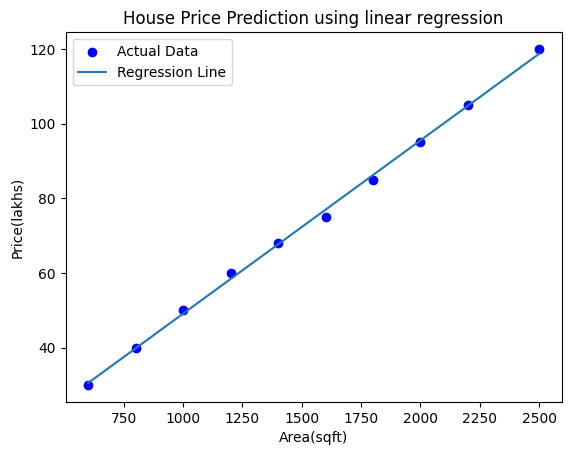

In [3]:
X=df[["Area_sqft"]]
y=df["Price_lakhs"]

X_train,X_test,y_train,y_test=train_test_split(
    X,y,test_size=0.2,random_state=42
)

model=LinearRegression()
model.fit(X_train,y_train)

print("Slope(m):", model.coef_[0])
print("Intercept(b):", model.intercept_)

y_pred=model.predict(X_test)

print("Actual vs Predicted:")
for actual,pred in zip(y_test,y_pred):
    print(f"Actual: {actual:.2f}, Predicted: {pred:.2f}")

mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("Mean Absolute Error:",mae)
print("R2 Score:",r2)

new_area=np.array([[1800]])
predicted_price=model.predict(new_area)
print("Predicted Price for 1800 sqft house: Rs. {:.2f} lakhs".format(predicted_price[0]))

plt.scatter(X,y,color="blue",label="Actual Data")
plt.plot(X,model.predict(X),label="Regression Line")
plt.xlabel("Area(sqft)")
plt.ylabel("Price(lakhs)")
plt.title("House Price Prediction using linear regression")
plt.legend()
plt.show()

#Multilinear Regression
Scenario: Predicting House Price Based on Multiple Factors A real estate company wants to predict the price of a house based on several important features: Area (square feet) Number of bedrooms Age of the house (years) Distance from city center (km)

Since multiple factors influence price, we use Multiple Linear Regression.

Price=b0+b1(Area)+b2(Bedrooms)+b3(Age)+b4(Distance)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score

data = {
    "Area_sqft": [800,1000,1200,1500,1800,2000,2200,2500,900,1600,1400,2100],
    "Bedrooms": [2,2,3,3,4,4,4,5,2,3,3,4],
    "Age_years": [15,10,8,5,4,3,2,1,12,6,7,3],
    "Distance_km": [12,10,8,6,5,4,3,2,11,7,9,4],
    "Price_lakhs": [40,50,62,75,90,105,120,140,45,80,70,110]
}
df=pd.DataFrame(data)
print("DataSet:")
print(df)

DataSet:
    Area_sqft  Bedrooms  Age_years  Distance_km  Price_lakhs
0         800         2         15           12           40
1        1000         2         10           10           50
2        1200         3          8            8           62
3        1500         3          5            6           75
4        1800         4          4            5           90
5        2000         4          3            4          105
6        2200         4          2            3          120
7        2500         5          1            2          140
8         900         2         12           11           45
9        1600         3          6            7           80
10       1400         3          7            9           70
11       2100         4          3            4          110


In [5]:
X=df[["Area_sqft","Bedrooms","Age_years","Distance_km"]]
y=df["Price_lakhs"]

X_train,X_test,y_train,y_test=train_test_split(
    X,y,test_size=0.2,random_state=42
)
model=LinearRegression()
model.fit(X_train,y_train)

y_pred=model.predict(X_test)

print("Actual vs Predicted:")
for actual,pred in zip(y_test,y_pred):
    print(f"Actual: {actual:.2f}, Predicted: {pred:.2f}")

print("Mean Absolute Error:",mean_absolute_error(y_test,y_pred))
print("R2 Score:",r2_score(y_test,y_pred))

new_house_data={
    "Area_sqft":[1700],
    "Bedrooms":[3],
    "Age_years":[5],
    "Distance_km":[6]
}
new_house_df=pd.DataFrame(new_house_data)
predicted_price=model.predict(new_house_df)
print("Predicted Price for New House: Rs. {:.2f} lakhs".format(predicted_price[0]))

Actual vs Predicted:
Actual: 70.00, Predicted: 54.90
Actual: 80.00, Predicted: 78.73
Actual: 40.00, Predicted: 54.54
Mean Absolute Error: 10.305282005371504
R2 Score: 0.4910337700032149
Predicted Price for New House: Rs. 86.76 lakhs


#Scenario:
 Predicting Employee Salary Based on Multiple Factors

A company wants to predict employee salary based on several important factors:

Years of Experience

Education Level (1 = Bachelor, 2 = Master, 3 = PhD)

Number of Skills Known

Performance Rating (1 to 5)

Since salary depends on multiple variables, the company uses Multiple Linear Regression.

Salary=b0​+b1​(Experience)+b2​(EducationLevel)+b3​(Skills)+b4​(Performance)

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("multil_salary_pred.csv")

X = df[["Experience_years","Education_Level","Skills_Count","Performance_Rating"]]
y = df["Salary_lpa"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
model = LinearRegression()
model.fit(X_train, y_train)

print("Slope (m):", model.coef_[0])
print("Intercept (b):", model.intercept_)
y_pred = model.predict(X_test)

for actual, pred in zip(y_test, y_pred):
    print(f"Actual: {actual:.2f}, Predicted: {pred:.2f}")
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("R2 Score:", r2)
new_employee = pd.DataFrame(
    [[5, 1, 4, 3]],
    columns=["Experience_years","Education_Level","Skills_Count","Performance_Rating"]
)

predicted_salary = model.predict(new_employee)

print(f"Predicted Salary: {predicted_salary[0]:.2f} LPA")

Saving multil_salary_pred.csv to multil_salary_pred.csv
Slope (m): 1.2559241706161157
Intercept (b): 0.523696682464454
Actual: 11.00, Predicted: 11.09
Actual: 7.50, Predicted: 7.95
Actual: 4.00, Predicted: 3.42
Mean Absolute Error: 0.37401263823064895
R2 Score: 0.9776241228056101
Predicted Salary: 8.65 LPA
